In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

0.8289113443652403
0.16479157


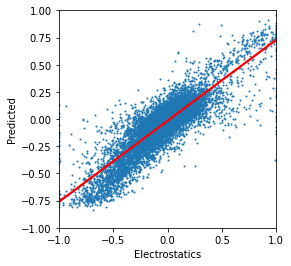

0.737853936239046
0.17163767


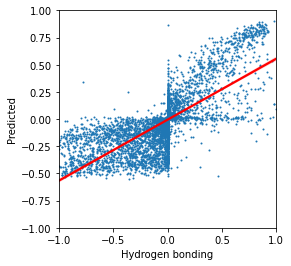

0.7939834118649287
0.38506165


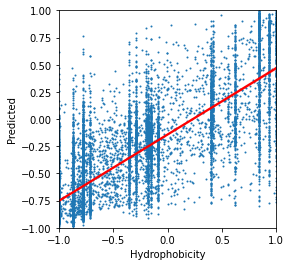

In [2]:
experiments = ['AtomNet_feat0_tangent_main','AtomNet_feat1_tangent_main','AtomNet_feat2_tangent_main']
feature_name = ['Electrostatics', 'Hydrogen bonding', 'Hydrophobicity']
for i,experiment in enumerate(experiments):
    preds = np.load(f'{experiment}_preds.npy')
    labels = np.load(f'{experiment}_labels.npy')
    sample = np.random.choice(len(preds),10000,replace=False)
    preds_sample = preds[sample]
    labels_sample = labels[sample]
    prla = np.stack([preds,labels])
    corr = np.corrcoef(prla)
    rmsd = np.sqrt(mean_squared_error(labels,preds))
    print(corr[0,1])
    print(rmsd)
    fig = sns.regplot(labels_sample,preds_sample,scatter_kws={'s':1,'alpha':1.0},line_kws={"color": "red"})
    plt.xlabel(feature_name[i])
    plt.ylabel('Predicted')
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    plt.axes().set_aspect('equal')
    plt.show()
    fig = fig.get_figure()
    #fig.savefig(f'figures/{feature_name[i]}_predicted.pdf')